## Exercise 2  
_________________________________________________________________________________________________________________________________________________________________________________________________________
The given functions have to be minimized using the following methods:
1. Gradient Descent Method
2. Newton's Method  

To do so, we have to use the following algorithms:  
_________________________________________________________________________________________________________________________________________________________________________________________________________

**<u>Algorithm 1: Gradient Descent</u>**  
**Require**: $x_{0}$  
**for** k $\geq$ 0  **do**:
  - compute direction $p_{k}$, where: $p_{k}$ = -$\nabla$ $f(x_{k})$
  - find $\alpha_{k}$ from line search
  - update:  $x_{k} \leftarrow x_{k} + \alpha_{k} p_{k}$ 
  - **stop** when the stopping criterion is satisfied  

**end for**

**<u>Algorithm 2: Newton's Method</u>**  
**Require**: $x_{0}$  
**for** k $\geq$ 0 **do**:
  - compute the direction $p_{k}$, where: $\nabla^{2} f(x_{k}) p_{k} = -\nabla f(x_{k})$
  - find $\alpha_{k}$ from line search
  - update: $x_{k} \leftarrow x_{k} + \alpha_{k} p_{k}$
  - **stop** when the stopping criterion is satisfied 
   
**end for**  

<span style="color: red;">**Warning:**</span> The descent dierection $p_{k}$ is valid only if the hessian is <u>positive definite</u>

_________________________________________________________________________________________________________________________________________________________________________________________________________
Now how to find the descent direction:  
_________________________________________________________________________________________________________________________________________________________________________________________________________

**<u>Algorithm 3: Backtracking Line Search</u>**  
Choose $\bar{\alpha} > 0$, $\rho \in (0, 1)$, $c \in (0, 1)$; set $\alpha \leftarrow \bar{\alpha}$;  
**repeat** until $f(x_{k} + \alpha p_{k}) \leq f(x_{k}) + c \alpha \nabla f_{k}^{T} p_{k}$:  
$\alpha \leftarrow \rho \alpha$  
**end** (repeat)  
Terminate with $\alpha_{k} \leftarrow \alpha$.

_________________________________________________________________________________________________________________________________________________________________________________________________________


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nd
import pendulum

In [98]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_method(f, g, x0, iterations=7000, tolerance=1e-4, alpha_initial=1, c=1e-4, rho=0.5):
    x_vals = [x0]
    x_k = x0
    alpha_vals = []
    
    print("Gradient Method Starts")
    for k in range(1, iterations + 1):
        grad = g(x_k)
        p_k = -grad
        
        # Backtracking line search
        alpha = alpha_initial
        while True:
            x_new = x_k + alpha * p_k
            f_new = f(x_new)
            f_k = f(x_k)
            # Handle scalar and vector cases
            if np.isscalar(grad):
                condition = f_new > f_k + c * alpha * grad * p_k
            else:
                condition = f_new > f_k + c * alpha * np.dot(grad, p_k)
            if condition:
                alpha *= rho
            else:
                break

        # Update x_k
        x_new = x_k + alpha * p_k
        x_vals.append(x_new)
        alpha_vals.append(alpha)
        
        # Exit condition
        grad_new = g(x_new)
        if np.linalg.norm(grad_new) < tolerance:
            print(f"Gradient Method converged after {k} iterations.")
            optimum = x_new
            break
        
        x_k = x_new
    else:
        print("Did not converge within the maximum number of iterations.")
        optimum = x_k

    print(f"The optimum value computed is: {optimum}")
    
    # Plotting
    distance_history = [np.linalg.norm(x - optimum) for x in x_vals]
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))

    # Subplot 1: Convergence of the distance to the computed optimum
    axs[0].plot(distance_history, label='Distance to Computed Optimum', color='blue')
    axs[0].set_title('Convergence of Gradient Descent with Backtracking Line Search')
    axs[0].set_xlabel('Iteration')
    axs[0].set_ylabel('Distance to Computed Optimum')
    axs[0].grid(True)
    axs[0].legend()

    # Subplot 2: Value of alpha in the backtracking line search
    axs[1].plot(alpha_vals, label='Alpha (Step Size)', color='green')
    axs[1].set_title('Value of Alpha in Backtracking Line Search')
    axs[1].set_xlabel('Iteration')
    axs[1].set_ylabel('Alpha (Step Size)')
    axs[1].grid(True)
    axs[1].legend()

    plt.tight_layout()
    plt.show()
    
    return optimum


In [100]:
def newtons_method(f, g, h, x0, iterations=1000, tolerance=1e-6, alpha_initial=1, c=1e-4, rho=0.5, gamma=1e-3):
    x_vals = [x0]
    x_k = x0
    alpha_vals = []
    
    print("Newton's Method Starts")
    for k in range(1, iterations + 1):
        grad = g(x_k)
        H = h(x_k)
        
        if isinstance(x_k, np.ndarray):
            # Check if Hessian is positive definite
            try:
                np.linalg.cholesky(H)
                is_positive_definite = True
            except np.linalg.LinAlgError:
                is_positive_definite = False
            
            if is_positive_definite:
                p_k = -np.linalg.solve(H, grad)
            else:
                # Regularize Hessian
                H_reg = H + gamma * np.eye(H.shape[0])
                p_k = -np.linalg.solve(H_reg, grad)
        else:
            # Scalar case
            if H <= 0:
                H_reg = H + gamma
                p_k = -grad / H_reg
            else:
                p_k = -grad / H

        # Backtracking line search
        alpha = alpha_initial
        while True:
            x_new = x_k + alpha * p_k
            f_new = f(x_new)
            f_k = f(x_k)
            if np.isscalar(grad):
                condition = f_new > f_k + c * alpha * grad * p_k
            else:
                condition = f_new > f_k + c * alpha * np.dot(grad, p_k)
            if condition:
                alpha *= rho
            else:
                break

        # Update x_k
        x_new = x_k + alpha * p_k
        x_vals.append(x_new)
        alpha_vals.append(alpha)
        
        # Exit condition
        grad_new = g(x_new)
        if np.linalg.norm(grad_new) < tolerance:
            print(f"Newton's Method converged after {k} iterations.")
            optimum = x_new
            break
        
        x_k = x_new
    else:
        print("Did not converge within the maximum number of iterations.")
        optimum = x_k

    print(f"The optimum value computed is: {optimum}")
    
    # Plotting
    distance_history = [np.linalg.norm(x - optimum) for x in x_vals]
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))

    # Subplot 1: Convergence of the distance to the computed optimum
    axs[0].plot(distance_history, label='Distance to Computed Optimum', color='blue')
    axs[0].set_title('Convergence of Newton\'s Method with Backtracking Line Search')
    axs[0].set_xlabel('Iteration')
    axs[0].set_ylabel('Distance to Computed Optimum')
    axs[0].grid(True)
    axs[0].legend()

    # Subplot 2: Value of alpha in the backtracking line search
    axs[1].plot(alpha_vals, label='Alpha (Step Size)', color='green')
    axs[1].set_title('Value of Alpha in Backtracking Line Search')
    axs[1].set_xlabel('Iteration')
    axs[1].set_ylabel('Alpha (Step Size)')
    axs[1].grid(True)
    axs[1].legend()

    plt.tight_layout()
    plt.show()
    
    return optimum


 **Ex 2.1)** $$\begin{equation} \notag f(x) = -e^{-(x-1)^2}, \quad \text{starting with } x_0 = 0\end{equation}$$

Gradient Method Starts
Gradient Method converged after 2757 iterations.
The optimum value computed is: 1.0000492509837287


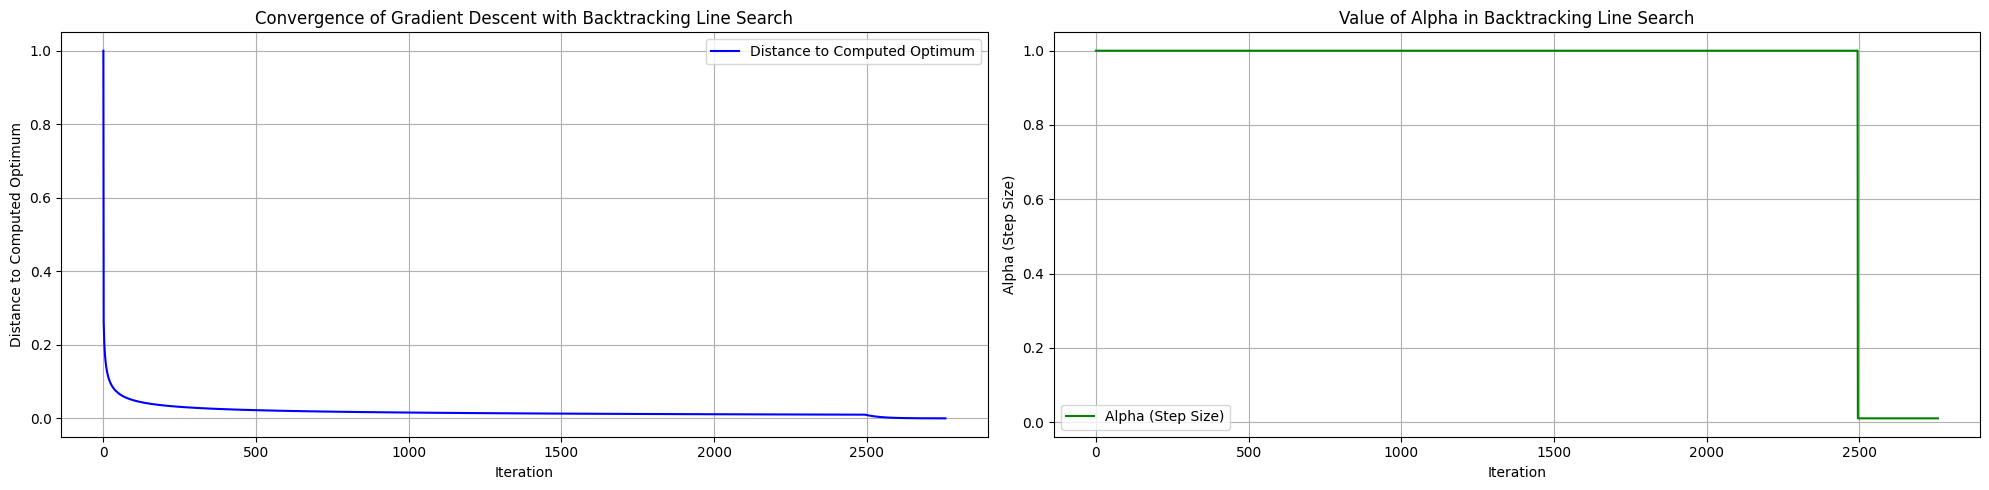

Newton's Method Starts
Newton's Method converged after 5 iterations.
The optimum value computed is: 0.9999999999999956


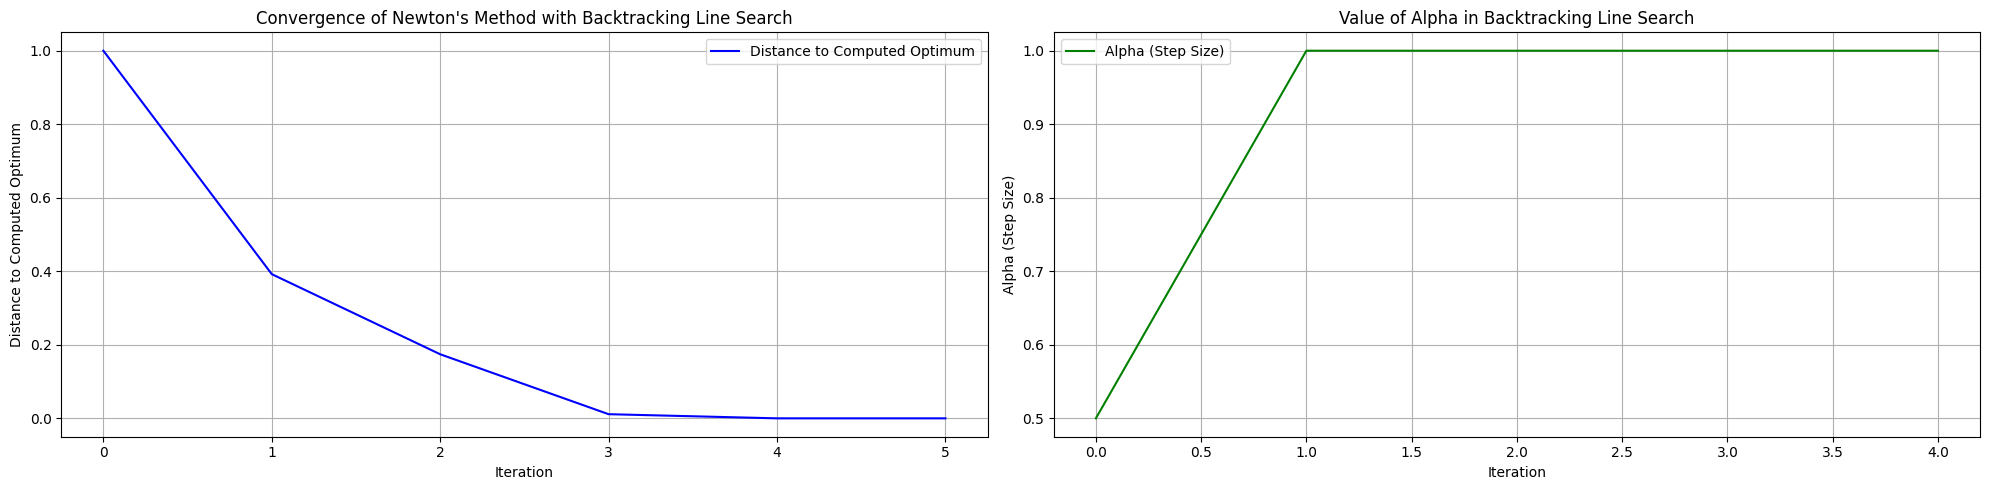

In [97]:
# Function definition
def f(x):
    return -np.exp(-((x - 1)**2))


# Gradient (first derivative) of f
def g(x):
    return nd.Derivative(f)(x)

# Hessian (second derivative) of f
def h(x):
    return nd.Derivative(f, n=2)(x)

# Gradient Descent Method
def gradient_method(f,g,x0 = 0,iterations = 7000,tolerance = 1e-4,alpha_initial = 1,c = 1e-04, rho = 0.01):
    x_vals=[x0]
    x_k=x0
    alpha_vals=[alpha_initial]
    
    print("Gradient Method Starts")
    for k in range(1,iterations):
        grad = g(x_k)
        p_k = -grad  
                
        # Backtracking line search
        alpha = alpha_initial
        while f(x_k + alpha * p_k) > f(x_k) + c * alpha *np.dot(grad,p_k):
            alpha =alpha*rho

            
        # Update new x_k
        x_new = x_k + alpha * p_k
        x_vals.append(x_new)
        alpha_vals.append(alpha)
        # Exit condition
        if np.linalg.norm(g(x_new)) < tolerance:
            print(f"Gradient Method converged after {k} iterations.")
            optimum=x_new
            break
        
        x_k = x_new
        

    
    print(f"The optimum value computed is: {optimum}")
    

    distance_history = [np.linalg.norm(x - optimum) for x in x_vals]
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))

    # Subplot 1: Convergence of the distance to the computed optimum
    axs[0].plot(distance_history,
                label='Distance to Computed Optimum', color='blue')
    axs[0].set_title(
        'Convergence of Gradient Descent with Backtracking Line Search')
    axs[0].set_xlabel('Iteration')
    axs[0].set_ylabel('Distance to Computed Optimum')
    axs[0].grid(True)
    axs[0].legend()

    # Subplot 2: Value of alpha in the backtracking line search
    axs[1].plot(alpha_vals, label='Alpha (Step Size)', color='green')
    axs[1].set_title('Value of Alpha in Backtracking Line Search')
    axs[1].set_xlabel('Iteration')
    axs[1].set_ylabel('Alpha (Step Size)')
    axs[1].grid(True)
    axs[1].legend()

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

# Newtons Method
def newtons_method(f, g, h, x0=0, iterations=17000, tolerance=1e-180, alpha_initial=5, c=1e-4, rho=0.5, gamma=1):
    x_vals = [x0]
    x_k = x0
    alpha_vals = []
    
    print("Newton's Method Starts")
    for k in range(1, iterations):
        grad = g(x_k)
        H = h(x_k)
        
        if isinstance(x_k, np.ndarray):
            if np.linalg.cholesky(H)==True: #Checks the positive definitness of Hessian
                p_k = np.linalg.solve(H, -grad)
            else:
                p_k = np.linalg.solve(H +gamma*np.eye(H.shape[0]), -grad)
        else:
            if H < 0:
                    # Apply regularization if the Hessian (second derivative) is negative
                    p_k = -(grad / (H + gamma))
            else:
                    # Use the unmodified Hessian if it's positive
                    p_k = -(grad / H)
        
                        
        # Backtracking line search
        alpha = alpha_initial
        while f(x_k + alpha * p_k) > f(x_k) + c * alpha * grad * p_k:
            alpha = alpha * rho

        # Update new x_k
        x_new = x_k + alpha * p_k
        x_vals.append(x_new)
        alpha_vals.append(alpha)
        
        # Exit condition
        if np.linalg.norm(g(x_new)) < tolerance:
            print(f"Newton's Method converged after {k} iterations.")
            optimum = x_new
            break
        
        x_k = x_new
    else:
        print("Did not converge within the maximum number of iterations.")
        optimum = x_k
    
    print(f"The optimum value computed is: {optimum}")
    #print(f"Alpha values during iterations: {alpha_vals}")

    distance_history = [np.linalg.norm(x - optimum) for x in x_vals]
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))

    # Subplot 1: Convergence of the distance to the computed optimum
    axs[0].plot(distance_history,
                label='Distance to Computed Optimum', color='blue')
    axs[0].set_title(
        'Convergence of Newton\'s Method with Backtracking Line Search')
    axs[0].set_xlabel('Iteration')
    axs[0].set_ylabel('Distance to Computed Optimum')
    axs[0].grid(True)
    axs[0].legend()

    # Subplot 2: Value of alpha in the backtracking line search
    axs[1].plot(alpha_vals, label='Alpha (Step Size)', color='green')
    axs[1].set_title('Value of Alpha in Backtracking Line Search')
    axs[1].set_xlabel('Iteration')
    axs[1].set_ylabel('Alpha (Step Size)')
    axs[1].grid(True)
    axs[1].legend()

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

# Gradient Method 
gradient_method(f=f,g=g,alpha_initial=1)
# Newtons Method 
newtons_method(f=f,g=g,h=h,alpha_initial=1)


**Ex 2.2)** $$\begin{equation}\notag f(x) = (1 - x)^2 + 100(y - x^2)^2, \quad \text{starting with } x_0 = y_0 = 1.2\end{equation}$$

Gradient Method Starts
Gradient Method converged after 9146 iterations.
The optimum value computed is: [0.99992203 0.99984392]


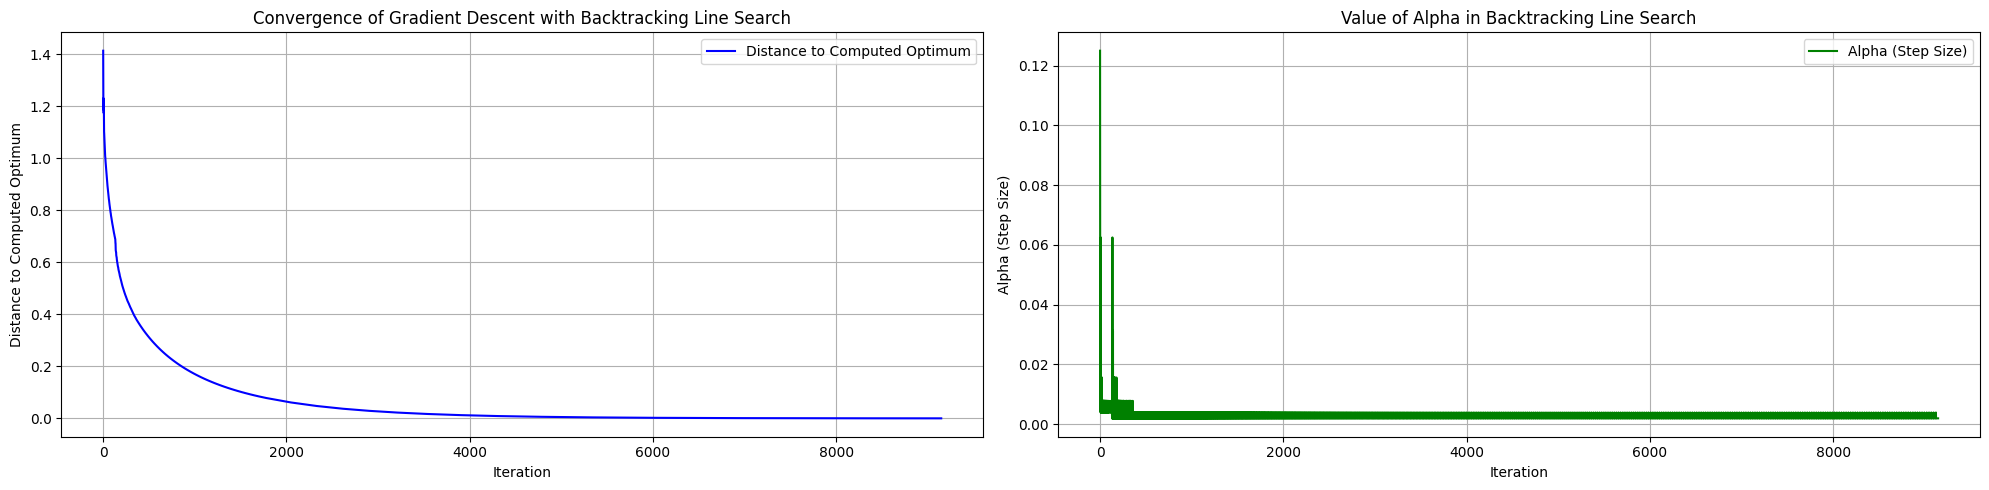

Newton's Method Starts
Newton's Method converged after 13 iterations.
The optimum value computed is: [0.99999998 0.99999995]


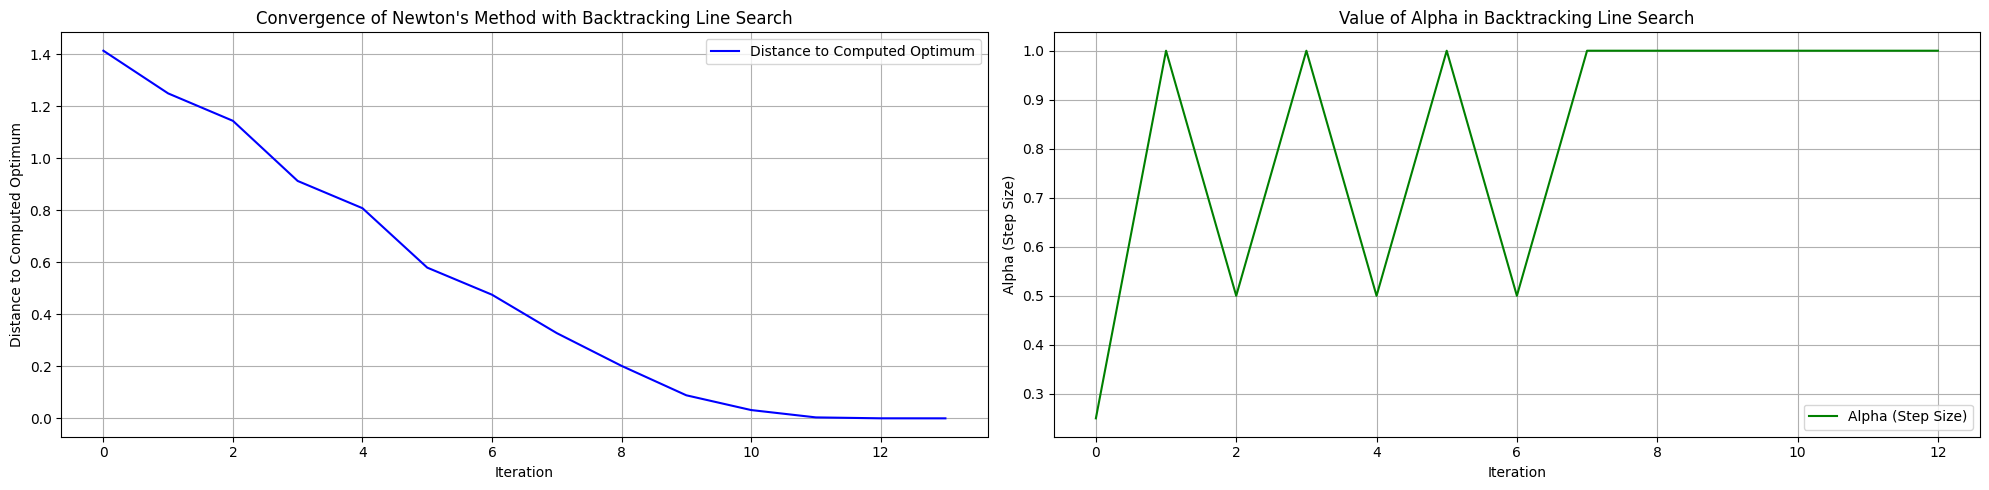

In [102]:
# Function definition
def f1(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Gradient of f1
def g1(x):
    df_dx = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2)
    df_dy = 200 * (x[1] - x[0]**2)
    return np.array([df_dx, df_dy])

# Hessian of f1
def h1(x):
    d2f_dx2 = 2 - 400 * x[1] + 1200 * x[0]**2
    d2f_dxdy = -400 * x[0]
    d2f_dydx = -400 * x[0]
    d2f_dy2 = 200
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dydx, d2f_dy2]])

# Initial guess
x0 = np.array([0.0, 0.0])

# Gradient Method
optimum_gd = gradient_method(f=f1, g=g1, x0=x0, iterations=10000, tolerance=1e-4, alpha_initial=1, c=1e-4, rho=0.5)

# Newton's Method
optimum_nm = newtons_method(f=f1, g=g1, h=h1, x0=x0, iterations=1000, tolerance=1e-6, alpha_initial=1, c=1e-4, rho=0.5)


**Ex 2.3)** $$\begin{equation}\notag f(x) = x^T \begin{bmatrix} 3 & 1 \\ 1 & 3 \end{bmatrix} x + \begin{bmatrix} -1 & 1 \end{bmatrix} x, \quad \text{starting with } x_0 = \begin{pmatrix} 10 \\ 10 \end{pmatrix}\end{equation}$$

Gradient Method Starts
Gradient Method converged after 2 iterations.
The optimum value computed is: [ 0.25 -0.25]


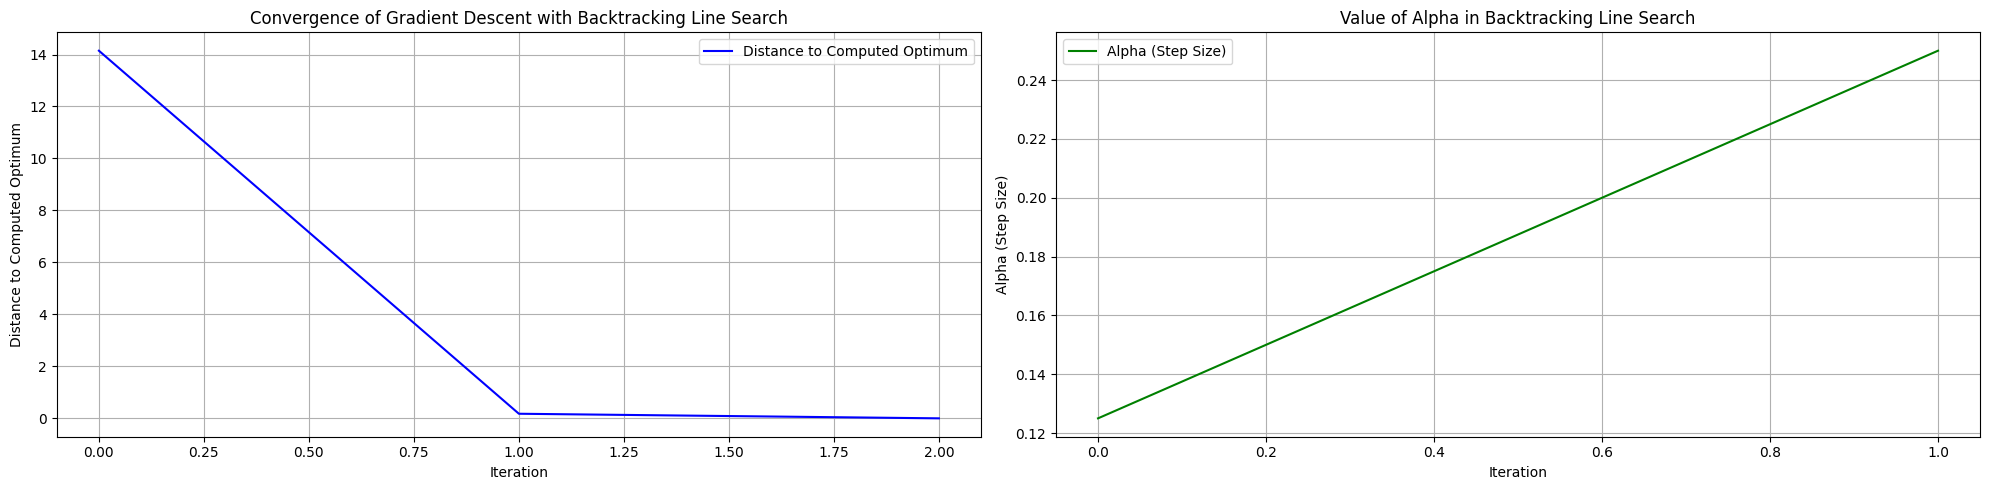

Newton's Method Starts
Newton's Method converged after 1 iterations.
The optimum value computed is: [ 0.25 -0.25]


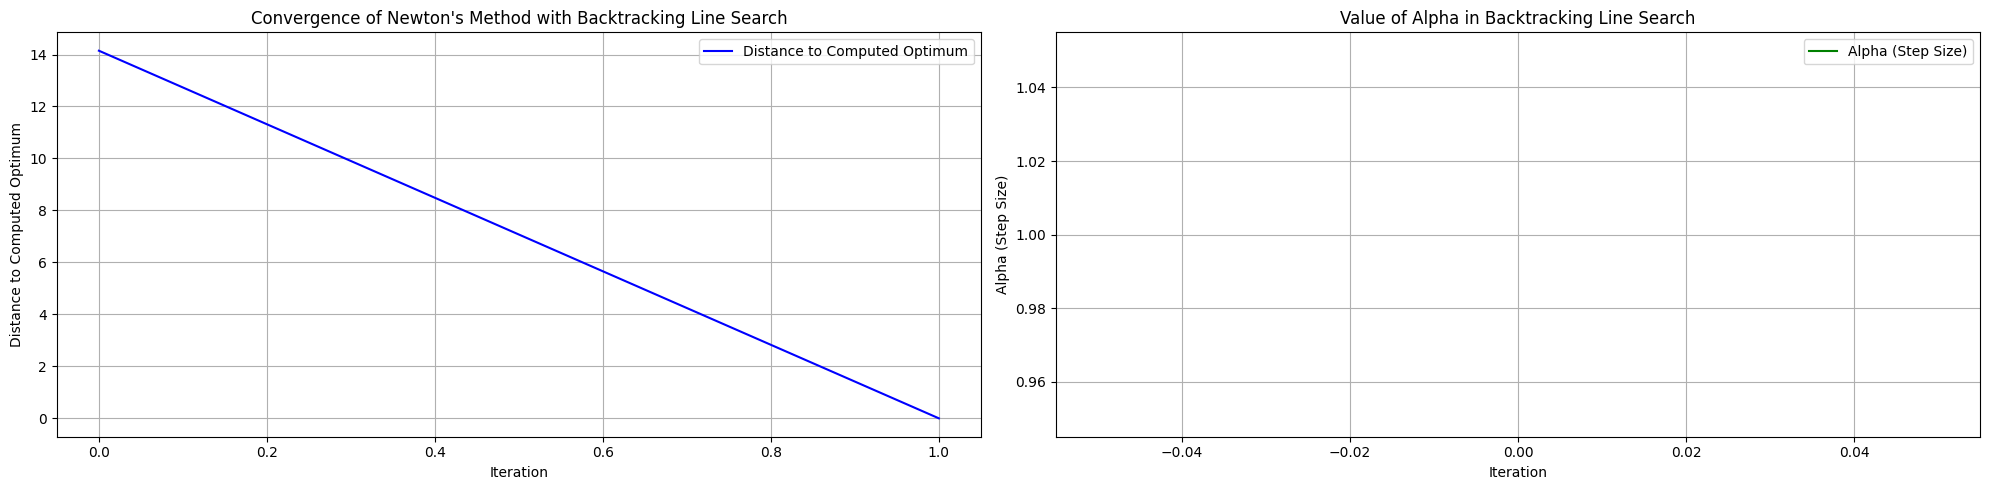

In [93]:
# Function definition
def f(x):
    return x.T @ np.array([[3, 1], [1, 3]]) @ x + np.array([-1, 1]).T @ x

# Gradient of f
def g(x):
    return np.array([6 * x[0] + 2 * x[1] - 1, 2 * x[0] + 6 * x[1] + 1])

# Hessian of f
def h(x):
    return np.array([[6, 2], [2, 6]])

# Initial guess
x0 = np.array([10.0, 10.0])

# Gradient Method
optimum_gd = gradient_method(f=f, g=g, x0=x0, iterations=1000, tolerance=1e-6, alpha_initial=1, c=1e-4, rho=0.5)

# Newton's Method
optimum_nm = newtons_method(f=f, g=g, h=h, x0=x0, iterations=1000, tolerance=1e-6, alpha_initial=1, c=1e-4, rho=0.5)


**Ex 2.4)** $$\begin{equation} \notag f(x) = \frac{1}{2}x^T \begin{bmatrix}1 & 1 & 0 \\ 1 & 1 & 0 \\ 0 & 0 & 4\end{bmatrix}x - \begin{bmatrix}0 & 0 & 1\end{bmatrix}x, \text{ starting with } x_0 = \begin{bmatrix}-10 \\ -10 \\ -10\end{bmatrix} \end{equation}$$

Gradient Method Starts
Gradient Method converged after 2 iterations.
The optimum value computed is: [0.   0.   0.25]


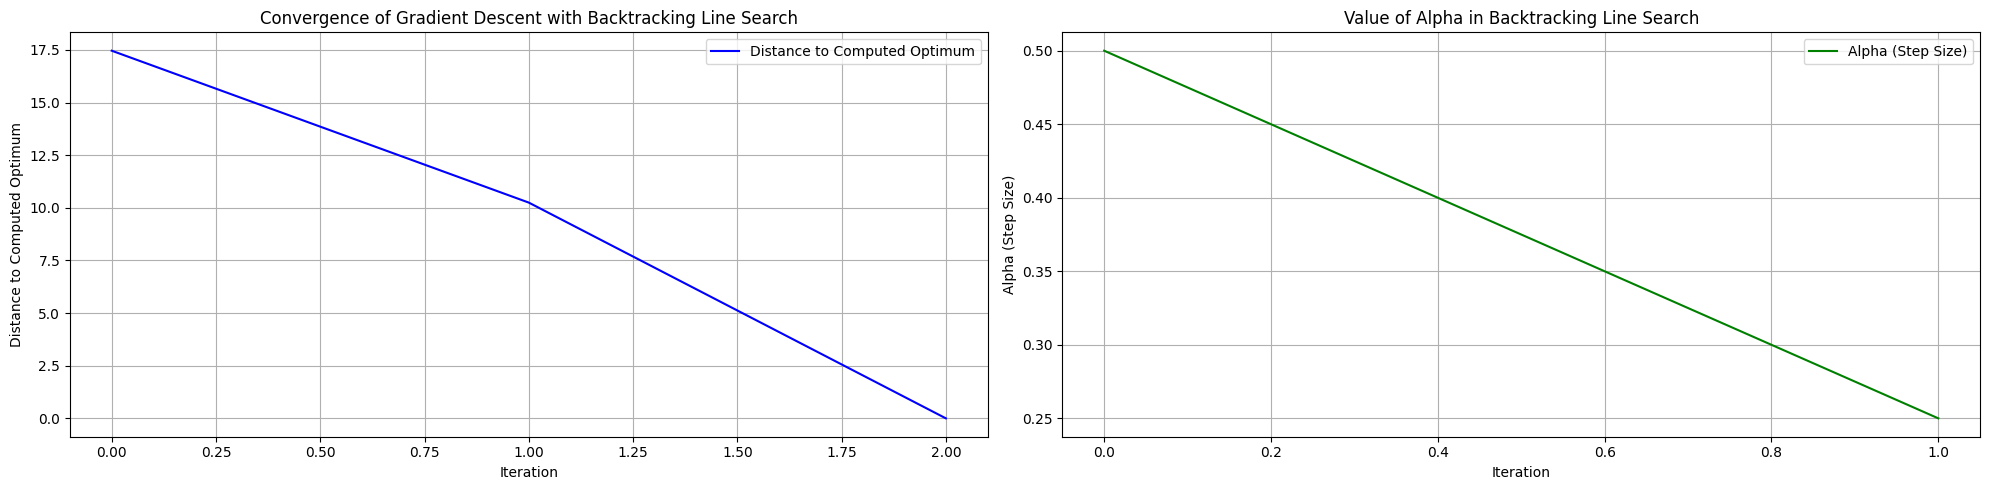

Newton's Method Starts
Newton's Method converged after 3 iterations.
The optimum value computed is: [-1.24839594e-09 -1.24785781e-09  2.50000000e-01]


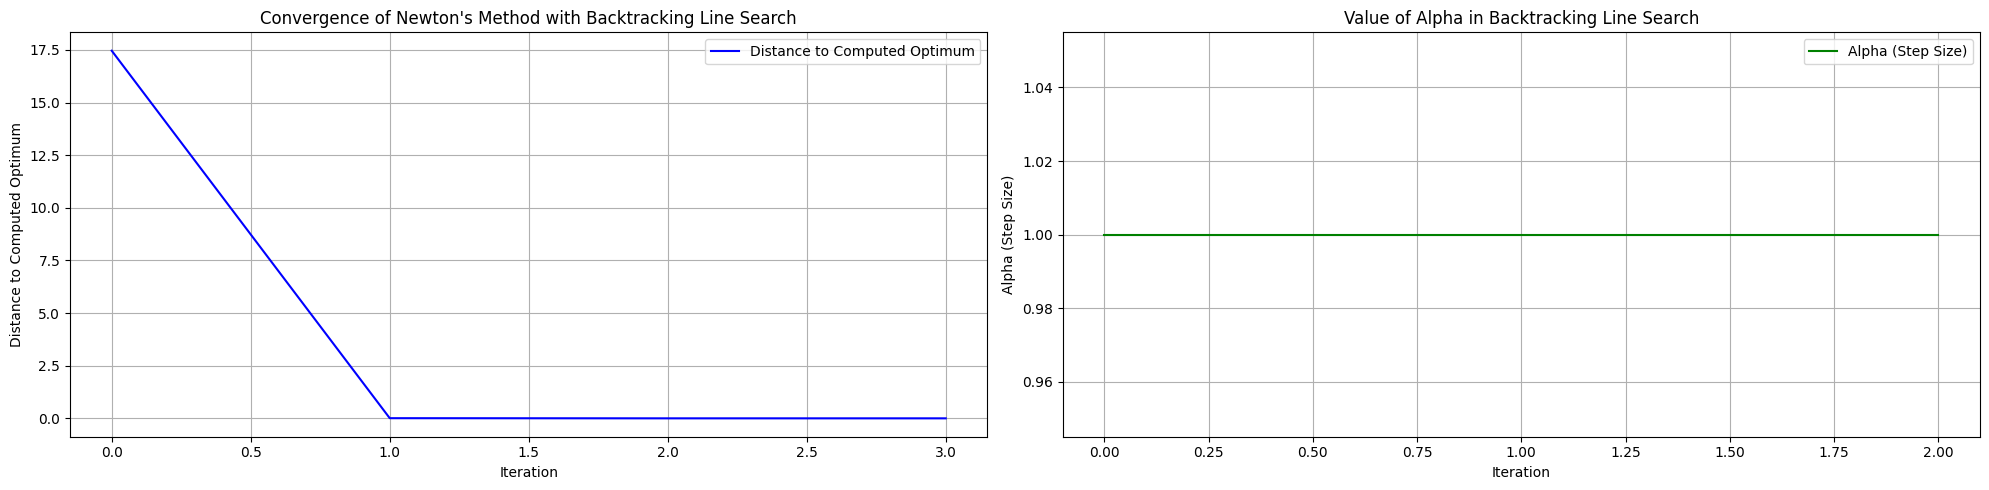

In [94]:

# Function definition
def f(x):
    Q = np.array([[1, 1, 0], [1, 1, 0], [0, 0, 4]])
    b = np.array([0, 0, 1])
    return 0.5 * x.T @ Q @ x - b.T @ x

# Gradient of f
def g(x):
    return np.array([x[0] + x[1], x[0] + x[1], 4 * x[2] - 1])

# Hessian of f
def h(x):
    return np.array([[1, 1, 0], [1, 1, 0], [0, 0, 4]])

# Initial guess
x0 = np.array([-10.0, -10.0, -10.0])

# Gradient Method
optimum_gd = gradient_method(f=f, g=g, x0=x0, iterations=1000, tolerance=1e-6, alpha_initial=1, c=1e-4, rho=0.5)

# Newton's Method
optimum_nm = newtons_method(f=f, g=g, h=h, x0=x0, iterations=1000, tolerance=1e-6, alpha_initial=1, c=1e-4, rho=0.5)
